# Esercitazione 11
L'esercitazione 11 richiede l'implementazione di una rete neurale attraverso la libreria _Keras_ di Python per la costruzione di una regressione lineare. 

## Esercizio 11.1
L'esercizio richiede che si studi il comportamento della rete neurale al variare dei suoi parametri: il numero di epoche $N_{epoch}$, di dati di allenamento $N_{train}$ e di rumore $\sigma$ sugli stessi. A tal proposito, ho creato quattro diversi modelli, con diverse combinazioni di $N_{epoch}$, $N_{train}$ e $\sigma$, per il calcolo della regressione lineare su dati del tipo $y=2x+1$ (a cui applicare il rumore gaussiano). Dato che è un fit lineare, ciascun modello ha bisogno di un solo neurone. Ogni modello ha poi un numero di dati di validazione pari al 10% dei dati di training.

In [94]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

### Modello 1: $\sigma=0.5$,  $N_{train}=500$, $N_{epoch}=30$

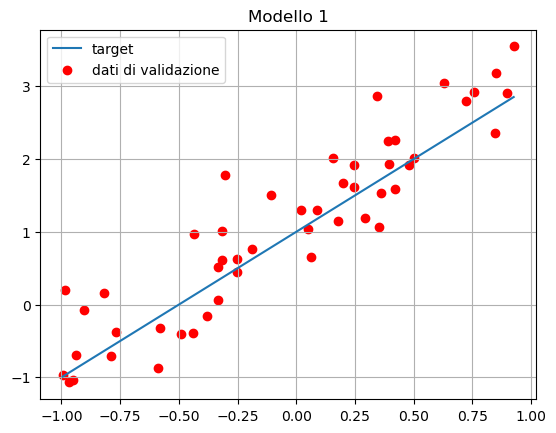

In [95]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='dati di validazione')
plt.legend()
plt.grid(True)
plt.title('Modello 1')
plt.show()

In [96]:
model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))

model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model1.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score1 = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

2/2 [==============================] - 0s 5ms/step - loss: 0.2769 - mse: 0.2769


4/4 [==============================] - 0s 2ms/step


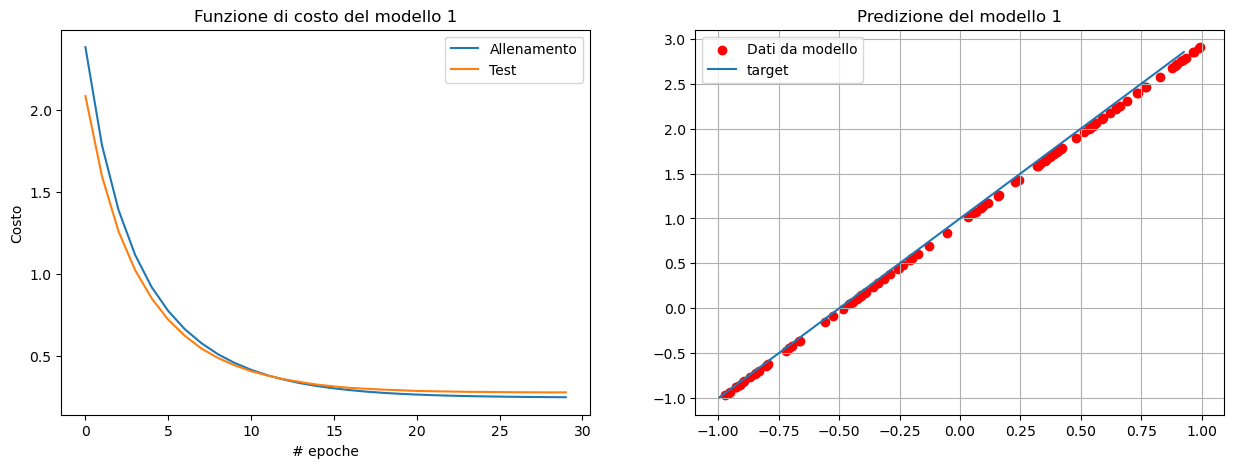

In [97]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_title('Funzione di costo del modello 1')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model1.predict(x_predicted)
ax1.set_title('Predizione del modello 1')
ax1.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
ax1.plot(x_valid, y_target, label='target')
ax1.grid(True)
ax1.legend()

plt.show()


### Modello 2: $\sigma=0.8$,  $N_{train}=500$, $N_{epoch}=30$

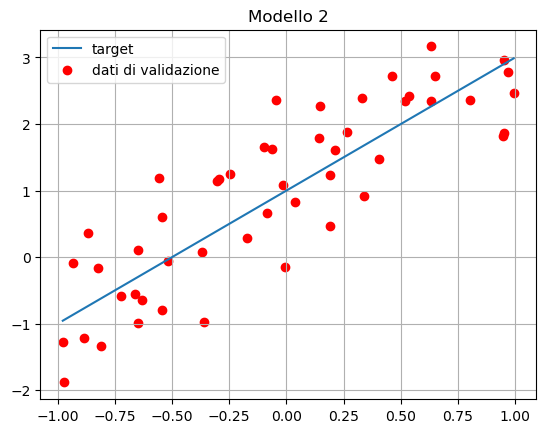

In [98]:
# generate training inputs
np.random.seed(1)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.8 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='dati di validazione')
plt.legend()
plt.grid(True)
plt.title('Modello 2')
plt.show()

In [99]:
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))

model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model2.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score2 = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

2/2 [==============================] - 0s 5ms/step - loss: 0.4635 - mse: 0.4635


4/4 [==============================] - 0s 2ms/step


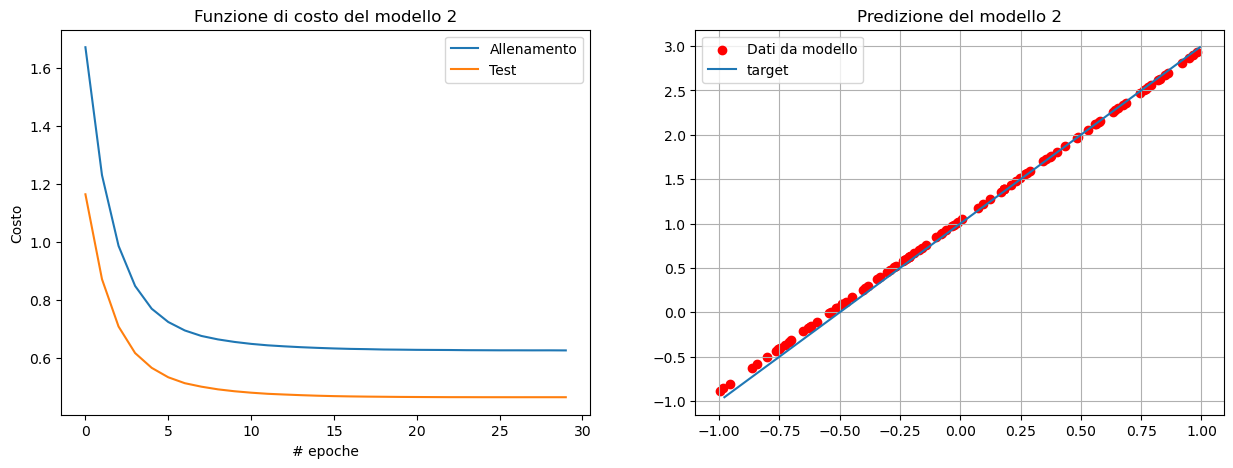

In [100]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_title('Funzione di costo del modello 2')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
ax1.set_title('Predizione del modello 2')
ax1.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
ax1.plot(x_valid, y_target, label='target')
ax1.grid(True)
ax1.legend()

plt.show()

### Modello 3: $\sigma=0.8$,  $N_{train}=800$, $N_{epoch}=30$

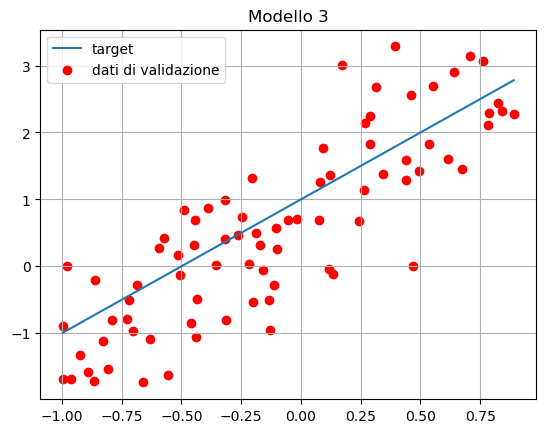

In [101]:
# generate training inputs
np.random.seed(2)
x_train = np.random.uniform(-1, 1, 800)
x_valid = np.random.uniform(-1, 1, 80)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.8 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='dati di validazione')
plt.legend()
plt.grid(True)
plt.title('Modello 3')
plt.show()

In [102]:
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))

model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score3 = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 0.5749 - mse: 0.5749


4/4 [==============================] - 0s 2ms/step


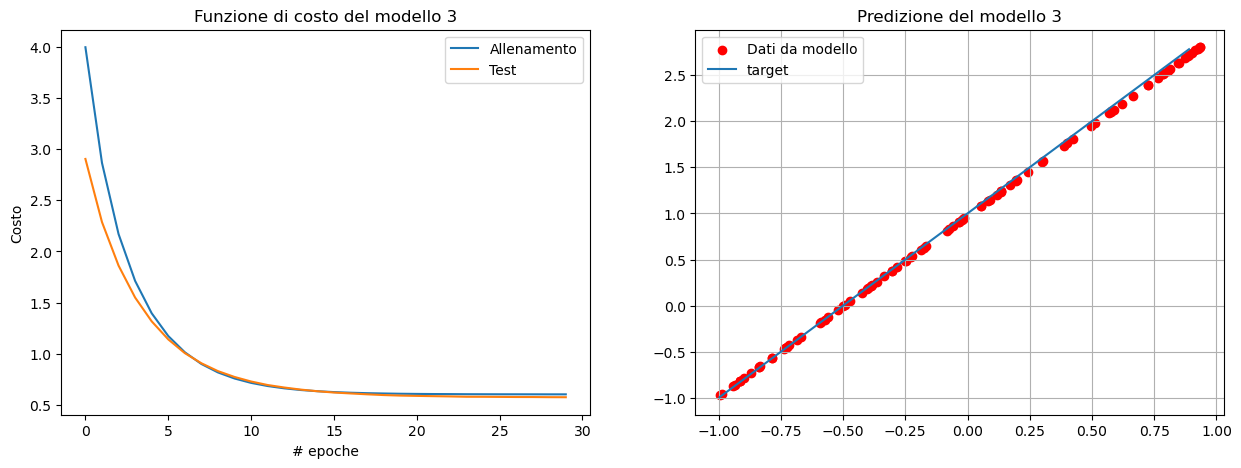

In [103]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_title('Funzione di costo del modello 3')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model3.predict(x_predicted)
ax1.set_title('Predizione del modello 3')
ax1.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
ax1.plot(x_valid, y_target, label='target')
ax1.grid(True)
ax1.legend()

plt.show()

### Modello 4: $\sigma=0.5$,  $N_{train}=500$, $N_{epoch}=50$

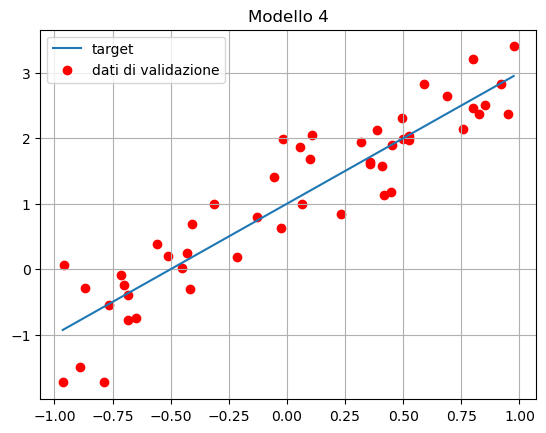

In [104]:
# generate training inputs
np.random.seed(3)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='dati di validazione')
plt.legend()
plt.grid(True)
plt.title('Modello 4')
plt.show()

In [105]:
model4 = tf.keras.Sequential()
model4.add(Dense(1, input_shape=(1,)))

model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model4.fit(x=x_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

# evaluate model
score4 = model4.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

2/2 [==============================] - 0s 6ms/step - loss: 0.2361 - mse: 0.2361


4/4 [==============================] - 0s 2ms/step


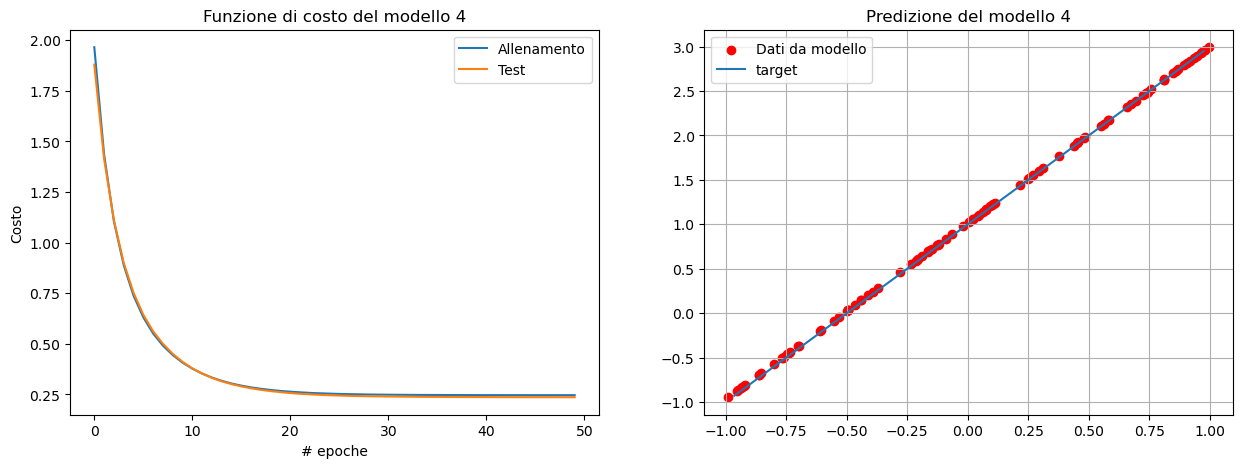

In [106]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(history.history['loss'])
ax0.plot(history.history['val_loss'])
ax0.set_title('Funzione di costo del modello 4')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model4.predict(x_predicted)
ax1.set_title('Predizione del modello 4')
ax1.scatter(x_predicted, y_predicted,color='r', label='Dati da modello')
ax1.plot(x_valid, y_target, label='target')
ax1.grid(True)
ax1.legend()

plt.show()


In [111]:
print("Costo modello 1: " + str(round(score1[0],2)))
print("Costo modello 2: " + str(round(score2[0],2)))
print("Costo modello 3: " + str(round(score3[0],2)))
print("Costo modello 4: " + str(round(score4[0],2)))

Costo modello 1: 0.28
Costo modello 2: 0.46
Costo modello 3: 0.57
Costo modello 4: 0.24


Dai valori delle funzioni costo dei diversi modelli posso vedere che, data la semplicità del problema, il miglior fit si ha con l'aumento di epoche, mentre l'aumento del rumore e del numero di dati peggiora la predizione: si può infatti vedere, prendendo ad esempio il modello 3, che molti dati con molto rumore hanno più possibilità di adattarsi a varianti della funzione target.

## Esercizio 11.2